<a href="https://colab.research.google.com/github/oussama016/ML-camp-journey/blob/main/02-regression/Car_price_project_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import io
import requests

ref : https://docs.python.org/3/tutorial/datastructures.html#the-del-statement

# Data preparation

In [ ]:
url = "https://raw.githubusercontent.com/oussama016/ML-camp-journey/main/02-regression/data.csv"

In [ ]:
s=requests.get(url).content

In [ ]:
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
c.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [ ]:
df = c.copy()

In [ ]:
#to work with methods that works with text need to specify str.  before the function
df.columns=df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [ ]:
#df.info()
#we want normalize the data set by applynig str methods 
#we need first just the object colomns
df.dtypes[df.dtypes  == "object"]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [ ]:
# df.dtypes[df.dtypes  == "object"] has 2 colomns one for index and one for values to point to the index (.index) and to point values (.values)


In [ ]:
#  to point to index 
df.dtypes[df.dtypes  == "object"].index


Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [ ]:
#  to convert to a list
col_strings = list(df.dtypes[df.dtypes  == "object"].index)


In [ ]:
# we did the lower case and replace whitespace with '_' we will have to iterate over the values of each string column
for col in col_strings:
  df[col] = df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# EDA : Exploratory data analysis

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print("*********************************")


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
*********************************
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
*********************************
year
[2011 2012 2013 1992 1993]
28
*********************************
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
*********************************
engine_hp
[335. 300. 230. 320. 172.]
356
*********************************
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
*********************************
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
*********************************
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
*********************************
number_of_doors
[ 2.  4.  3. nan]
3
*********************************
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-pe


*   Distribution of price




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.msrp.median(),df.msrp.mean(),df.msrp.max(),df.msrp.min()
df.msrp.value_counts()

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: msrp, Length: 6049, dtype: int64

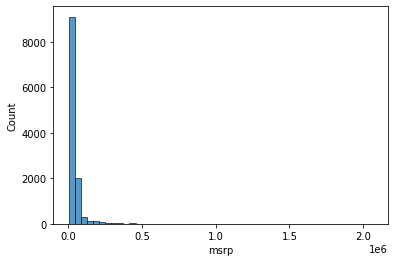

In [ ]:
sns.histplot(df.msrp,bins=50)
# we have a long tail distribution so we need to concentrate it ( there is some expensive cars that affect the distibution)

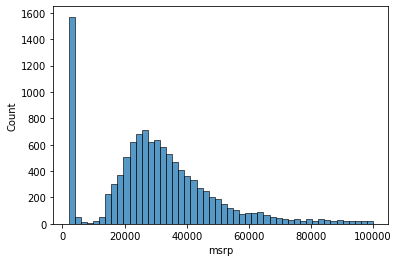

In [ ]:
sns.histplot(df[df.msrp < 100000].msrp,bins=50)



*   the long tail distribution will affect our ML model (confuse it ) we can solve the problem by applying log() to the target variable price 





In [ ]:
np.log([1,10,100,1000,10000,100000,1000000])
# but there still the probleme of the 0 in log 

array([ 0.        ,  2.30258509,  4.60517019,  6.90775528,  9.21034037,
       11.51292546, 13.81551056])

In [ ]:
np.log([0+1,1+1,10+1,100+1,1000+1,10000+1,100000+1,1000000+1])
#instead of adding 1 there is a equivalent : log1p
np.log1p([1,10,100,1000,10000,100000,1000000])

array([ 0.69314718,  2.39789527,  4.61512052,  6.90875478,  9.21044037,
       11.51293546, 13.81551156])

In [ ]:
prices = np.log1p(df.msrp)

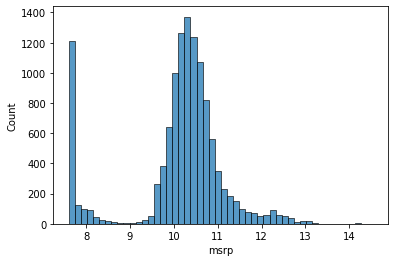

In [ ]:
sns.histplot(prices,bins=50)
# now it looks like normal distribution which is perfect for a model


*   Missing values





In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

#Setting up the validation framework

we will work a validation system :
*   60% trainnig
*   20% validation
*   20% testing


In [ ]:
#there is 11914 rows
n = df.shape[0]
n

11914

In [ ]:
n_test = int(df.shape[0]*0.2)
n_val = int(df.shape[0]*0.2)
n_train = n-(n_test+n_val)

n_test+n_train+n_val

11914

In [ ]:
#df_train = df.iloc[:n_train]
#df_val = df.iloc[n_train:n_val+n_train]
#df_test = df.iloc[n_val+n_train:]


**using this method we can have for example bmw in jst validation part and not the other parts so we need to shuffle it**

In [ ]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [ ]:
#with ramdom every one will get a random result but with .seed function we can have the same result and stil random
np.random.seed(2)
np.random.shuffle(idx)

In [ ]:
len(idx)

11914

In [ ]:
df_shuffle = df.iloc[idx]

In [ ]:
df_train = df_shuffle.iloc[:n_train].copy()
df_val = df_shuffle.iloc[n_train:n_val+n_train].copy()
df_test = df_shuffle.iloc[n_val+n_train:].copy()

In [ ]:
df_train
#we still have the shuffle index which is not convenient

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [ ]:
len(df_train)+len(df_test)+len(df_val)

11914

In [ ]:
#we still have the shuffle index which is not convenient
#we will take the default index 
df_train = df_train.reset_index()
df_test = df_test.reset_index()
df_val = df_val.reset_index()

In [ ]:
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [ ]:
# if we take this command we will get the index + values 
np.log1p(df_train.msrp)

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [ ]:
# we will select only the values 
np.log1p(df_train.msrp.values)

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [ ]:
# the last step is we need tod delete the target variable from Xtest Xval and Xtrain
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']



In [ ]:
df_train

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86



# Linear regression

In [ ]:
df_train.iloc[10]

index                                       7557
make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [ ]:
df_train[['engine_hp' ,'city_mpg','popularity']].iloc[10].values

array([453.,  11.,  86.])

In [ ]:
xi = [453.,  11.,  86.]
w0 = 7.17
w1 = [0.01,0.04,0.002]
def linear_regression(xi):
  n=len(xi)
  pred = w0
  for j in range(n) :
    pred = pred + w1[j]*xi[j]
  return pred

linear_regression(xi)

12.312

In [ ]:
np.expm1(12.312)

222347.2221101062

In [ ]:
np.log1p(222347.2221101062)

12.312

# Linear regression vector form

# Training a linear regression model  

*   W = (Xtranspos * X )-1 * Xtranspos * y



In [ ]:
X = [[10,148,24,1385],
     [71,132,25,2031],
      [11,453,11,86],
      [189,148,24,1385],
      [15,32,25,201],
      [81,43,12,806],
      [71,18,24,1385],
      [51,32,5,20],
      [231,3,2,86]]
X = np.array(X)
X


array([[  10,  148,   24, 1385],
       [  71,  132,   25, 2031],
       [  11,  453,   11,   86],
       [ 189,  148,   24, 1385],
       [  15,   32,   25,  201],
       [  81,   43,   12,  806],
       [  71,   18,   24, 1385],
       [  51,   32,    5,   20],
       [ 231,    3,    2,   86]])

In [ ]:
#we forgot to add 1 ( weight of w0)
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = np.column_stack([ones,X])

In [ ]:
#X.T is the transpose of X 
#matrcie * matrice => matrice.dot(matrice)
#XTX = Xtranspos * X
XTX = X.T.dot(X)

In [ ]:
#(Xtranspos * X )-1
XTXIinv = np.linalg.inv(XTX)

#matrice identite
XTXIinv.dot(XTX)

array([[ 1.00000000e+00, -1.85028642e-13, -2.35220697e-13,
        -7.76993487e-14, -6.07580837e-12],
       [ 1.15567058e-17,  1.00000000e+00,  9.10812834e-16,
         2.83343956e-16,  2.00756920e-14],
       [-3.40679298e-18, -3.88012135e-16,  1.00000000e+00,
        -5.16866387e-17, -1.87691852e-15],
       [ 1.05228597e-16,  6.38527317e-15, -4.42750220e-15,
         1.00000000e+00,  2.46125067e-13],
       [-8.67255859e-19, -7.60339125e-18,  1.83492747e-17,
        -2.26570725e-17,  1.00000000e+00]])

In [ ]:
y = [  71,   18,14,88,7,23,1,   24, 1385]
y

[71, 18, 14, 88, 7, 23, 1, 24, 1385]

In [ ]:
#W = (Xtranspos * X )-1 * Xtranspos * y
w_full = XTXIinv.dot(X.T).dot(y)
#with w0 = w[0] and wi = w[1:]
w_full

array([ 1.93075036e+02,  3.67846662e+00, -2.17470164e-01, -1.15286102e+01,
       -1.11060231e-01])

# Car price baseline model

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
df_train.dtypes != "object"

index                 True
make                 False
model                False
year                  True
engine_fuel_type     False
engine_hp             True
engine_cylinders      True
transmission_type    False
driven_wheels        False
number_of_doors       True
market_category      False
vehicle_size         False
vehicle_style        False
highway_mpg           True
city_mpg              True
popularity            True
dtype: bool

In [ ]:
df_lnreg = df_train[['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']].copy()
df_lnreg.values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [ ]:
X_train = df_lnreg.values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [ ]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [ ]:
train_linear_regression(X_train,y_train)
#we have some missing values nan

(nan, array([nan, nan, nan, nan, nan]))

In [ ]:
np.isnan(y_train).sum()

0

In [ ]:
np.isnan(X_train).sum()

54

In [ ]:
df_lnreg.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [ ]:
# we will fill them by 0 it means the programm will ignore this feature for this row xi=0 => xi*wi => 0*wi ( w0 + 0*w1 + x2*w2 ........)
df_lnreg.fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [ ]:

X_train = df_lnreg.fillna(0).values

#test if x_train contains null values
np.isnan(X_train).sum()

0

In [ ]:
w0 ,w = train_linear_regression(X_train,y_train)

In [ ]:
ypred = X_train.dot(w) + w0
ypred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

In [ ]:
ypred - y_train

array([-0.02781925, -0.50032323, -0.22125759, ..., -0.14957294,
       -0.64458959, -0.54198867])

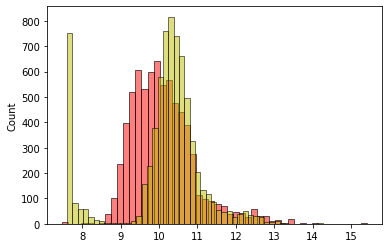

In [ ]:
sns.histplot(ypred,color='r',alpha=0.5,bins=50)
sns.histplot(y_train,color='y',alpha=0.5,bins=50)

# RMSE

RMSE (root mean square error ) 

In [ ]:
a = ((ypred - y_train)**2).mean()
np.sqrt(a)

0.7554192603920132

In [ ]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse(ypred, y_train)

0.7554192603920132


# Validating data set

we applied the RMSE on to trainnig data ( as sa test ) but we should should do it on **the Val dataset**

In [ ]:
df_lnreg = df_train[['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']].copy()
X_train = df_lnreg.fillna(0).values
w0 ,w = train_linear_regression(X_train,y_train)
ypred = X_train.dot(w) + w0


In [ ]:
base_features = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
def prepare_X(df):
  df_num = df[base_features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X


In [ ]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train,y_train)


X_val = prepare_X(df_val)
#calculate the yrediction for the valuation dataset
ypred_val = X_val.dot(w) + w0

#calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
rmse(ypred_val,y_val)


0.761653099130156

# Simple feature engineering

In [ ]:
df_train

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [ ]:
features = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']+['age']
features


['engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'age']

In [ ]:
def prepare_X(df):
  df = df.copy()
  #minus 2017 is because the data was collected on 2017 
  df['age'] = 2017 -df['year']
  features = base_features + ['age']
  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)


#before adding copy() on the df_train we worked on the original , when we added age column it was added to the original
#df_train.dtypes
#age       int64

In [ ]:
# delete the age colomn to only work with copy , to avoid working with original
#del df_train['age'] to rerun the function

In [ ]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [ ]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train,y_train)


X_val = prepare_X(df_val)
#calculate the yrediction for the valuation dataset
ypred_val = X_val.dot(w) + w0

#calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
rmse(ypred_val,y_val)

0.5172055461058299

there have been an improvement bases on RMSE: 

```
# from 0.76 --> 0.51
```
we can also visualite on plot 

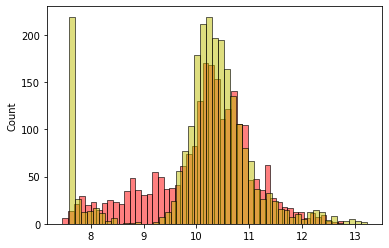

In [ ]:
sns.histplot(ypred_val,color='r',alpha=0.5,bins=50)
sns.histplot(y_val,color='y',alpha=0.5,bins=50)

# Categorical variables

Categorical variables are typically strings, and pandas identifies them as object types. These variables need to be converted to a numerical form because ML models can interpret only numerical features. It is possible to incorporate certain categories from a feature, not necessarily all of them. This transformation from categorical to numerical variables is known as One-Hot encoding.

In [ ]:
df_train.shape

(7150, 16)

In [ ]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

# we will be using  categorial values have to decompose them into colomns
ex: number of doors we have the combination of 2,3,4 doors


---
---

number_of_doors   ///////////   nbd2 ////////////////// nbd3  //////////////   nbd4


---
2///////////////////////////1///////////////0///////////////0
---
3///////////////////////////0///////////////1///////////////0
---
4///////////////////////////0///////////////0///////////////1
---
2///////////////////////////1///////////////0///////////////0
---
3///////////////////////////0///////////////1///////////////0
---


In [ ]:
df['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')



In [ ]:
#better way to do it is by a loop
#del df['num_doors_2']
#del df['num_doors_3']
#del df['num_doors_4']

In [ ]:
# to create colomns based on the cateorical variable (3 combination means 3 columns)

#for v in range(2,5):
#  df_train[f'num_doors_{v}'] = (df_train.number_of_doors == v).astype('int')

**Inserting values into strings**

In [ ]:
for v in range(2,5):
  print(f'num_doors_{v}',)

num_doors_2
num_doors_3
num_doors_4


In [ ]:
for v in range(2,5):
  print('num_doors_{}'.format(v))

num_doors_2
num_doors_3
num_doors_4


In [ ]:
for v in range(2,5):
  print('num_doors_%s'%(v))

num_doors_2
num_doors_3
num_doors_4


after modifying the data set training we will retrain 

In [ ]:
df_train.head()

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [ ]:
def prepare_X(df):
  df = df.copy()
  #minus 2017 is because the data was collected on 2017 
  df['age'] = 2017 -df['year']
  features = base_features + ['age']

  for v in range(2,5):
    df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
    features.append(f'num_doors_{v}')

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train,y_train)


X_val = prepare_X(df_val)
#calculate the yrediction for the valuation dataset
ypred_val = X_val.dot(w) + w0

#calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
rmse(ypred_val,y_val)

0.5157995641501678

compared to the previious result : rmse (without categorival var ) = 0.5172055461058299 it is almost neligible 



---


**we will try adding the best 5 maker (best 5 out the colomn df.make ) as categorical value**


---

In [ ]:
df.make.value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [ ]:
#to get the auto names they are in index column , the value column is the count values
df.make.value_counts().head(5).index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object')

---
convert from a data frame/array to a ::: **List** **Typle** **Dict**


---





In [ ]:
#to convert into list 
list(df.make.value_counts().head(5).index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [ ]:
#to convert into tuple
tuple(df.make.value_counts().head(5).index)

('chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge')

In [ ]:
#to convert into dict
dict(df.make.value_counts().head(5))

{'chevrolet': 1123,
 'ford': 881,
 'volkswagen': 809,
 'toyota': 746,
 'dodge': 626}

In [ ]:
makes = list(df.make.value_counts().head(5).index)

In [ ]:
def prepare_X(df):
  df = df.copy()
  #minus 2017 is because the data was collected on 2017 
  df['age'] = 2017 -df['year']
  features = base_features + ['age']

  for v in range(2,5):
    df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
    features.append(f'num_doors_{v}')
  
  for v in makes:
    df[f'make_{v}'] = (df.make == v).astype('int')
    features.append(f'make_{v}')

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train,y_train)


X_val = prepare_X(df_val)
#calculate the yrediction for the valuation dataset
ypred_val = X_val.dot(w) + w0

#calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
rmse(ypred_val,y_val)

0.5076038849556795

there is an improvemnt from 0.5157995641501678 to 0.5076038849556795



In [ ]:
df_train.dtypes

index                  int64
make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [ ]:
categories_variables = [ 'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
        'market_category', 'vehicle_size', 'vehicle_style',]
categories_variables

['make',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
list(df_train['engine_fuel_type'].value_counts().head(5).index)

['regular_unleaded',
 'premium_unleaded_(required)',
 'premium_unleaded_(recommended)',
 'flex-fuel_(unleaded/e85)',
 'diesel']

In [ ]:
categories = {}

for c in categories_variables:
  categories[c] = list(df_train[c].value_counts().head(5).index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

iterate over a dictionary of values

In [ ]:
for key,value in categories.items():
  print(key,value)
  for v in value :
    print(v)

make ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']
chevrolet
ford
volkswagen
toyota
dodge
engine_fuel_type ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']
regular_unleaded
premium_unleaded_(required)
premium_unleaded_(recommended)
flex-fuel_(unleaded/e85)
diesel
transmission_type ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']
automatic
manual
automated_manual
direct_drive
unknown
driven_wheels ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']
front_wheel_drive
rear_wheel_drive
all_wheel_drive
four_wheel_drive
market_category ['crossover', 'flex_fuel', 'luxury', 'hatchback', 'luxury,performance']
crossover
flex_fuel
luxury
hatchback
luxury,performance
vehicle_size ['compact', 'midsize', 'large']
compact
midsize
large
vehicle_style ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']
sedan
4dr_suv
coupe
convertible
4dr_hatchback


In [ ]:
def prepare_X(df):
  df = df.copy()
  #minus 2017 is because the data was collected on 2017 
  df['age'] = 2017 -df['year']
  features = base_features + ['age']

  for v in range(2,5):
    df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
    features.append(f'num_doors_{v}')
  
  for key,value in categories.items():
    for v in value:
      df[f'{key}_{v}'] = (df[key] == v).astype('int')
      features.append(f'{key}_{v}')

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w0 ,w = train_linear_regression(X_train,y_train)


X_val = prepare_X(df_val)
#calculate the yrediction for the valuation dataset
ypred_val = X_val.dot(w) + w0

#calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
rmse(ypred_val,y_val)

41.98123097210177



# Regularisation

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a hyperparameter of the model. After applying regularization the model performance improved.

regularisation means controlling the weights

In [ ]:
# 2column is a duplicate of the 3rd column
x = [
    [4,4,4],
     [3,5,5],
     [5,1,1],
     [5,4,4],
     [7,5,5],
     [4,5,5.0001]

]
y = [1,2,3,1,2,3]
x

[[4, 4, 4], [3, 5, 5], [5, 1, 1], [5, 4, 4], [7, 5, 5], [4, 5, 5.0001]]

In [ ]:
#
X = np.array(x)
X

array([[4.    , 4.    , 4.    ],
       [3.    , 5.    , 5.    ],
       [5.    , 1.    , 1.    ],
       [5.    , 4.    , 4.    ],
       [7.    , 5.    , 5.    ],
       [4.    , 5.    , 5.0001]])

In [ ]:
XTX = X.T.dot(X)

In [ ]:
XTX_inv = np.linalg.inv(XTX)

In [ ]:
XTX_inv.dot(X.T).dot(y)
# the observation here is we made the column 2 and 3 similar we cound't calculate the inverse of XTX
#but when we slightly adjusted the 3 column by .0001 => 5.0001
# and when calculate the weights W 
# the first column in X does not have a probleme so the firt weight : 4.13226616e-01 is OOOKKK
#The second and 3 colomn were almost duplicate so the weight are ridiculus (-1.74491552e+04,  1.74490757e+04) === (-174490,-174491)

array([ 4.13226616e-01, -1.74491552e+04,  1.74490757e+04])

 the observation here is we made the column 2 and 3 similar we cound't calculate the inverse of XTX
but when we slightly adjusted the 3 column by .0001 => 5.0001
and when calculate the weights W 
 the first column in X does not have a probleme so the firt weight : 4.13226616e-01 is OOOKKK
The second and 3 colomn were almost duplicate so the weight are ridiculus ::
(-1.74491552e+04,  1.74490757e+04) === (-174490,-174491)

In [ ]:
# to solve the probleme we can add small number on the diagonale
XTX = [[1,2,2],[2,1,1.000001],[2,1.0000001,1]]

In [ ]:
XTX = np.array(XTX)

In [ ]:
np.linalg.inv(XTX)

array([[-3.33333374e-01,  6.06060624e-02,  6.06060624e-01],
       [ 6.06060624e-01, -9.09090937e+05,  9.09090634e+05],
       [ 6.06060625e-02,  9.09090906e+05, -9.09090937e+05]])

In [ ]:
# by adding a small number to the diagonal the ridiculous result desappears
#XTX = [[1.00001,2,2],[2,1.00001,1.000001],[2,1.000001,1.00001]]

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
XTX = [[1,2,2],[2,1,1.000001],[2,1.0000001,1]]
XTX = np.array(XTX)
XTX = XTX + 0.01*np.eye(3)

In [ ]:
np.linalg.inv(XTX)
XTX.size

9

In [ ]:
def train_linear_regression_regularised(X, y,r=0.001):
    #add the column for w0 (all coefficient == 1)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)

    #add the coefficent r to diagnonal of the XTX matrix 
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
# we don't need preparing the data so it stays as it is 

In [ ]:
X_train = prepare_X(df_train)
#w0 ,w = train_linear_regression(X_train,y_train)
# train based on the modified matrix with the r factor (regularisation factor )
w0 ,w = train_linear_regression_regularised(X_train,y_train,r=0.01)



X_val = prepare_X(df_val)
#calculate the yrediction for the valuation dataset
ypred_val = X_val.dot(w) + w0



#calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
rmse(ypred_val,y_val)

0.45652199015305106

the result is much better that without regularisation

**with** : 0.45652199015305106

**without** : 41.98123097210177 **(attention its 41. not 0.41 !!!!!! )**

and the better result until now 


# Tuning the model 

Tuning the model consisted of finding the best regularization hyperparameter value, using the validation partition of the dataset. The model was then trained with this regularization value.

tunning means finding the best regularation coefficient r

In [ ]:
score = []
for r in [0.0,0.00001,0.0001,0.001,0.1,1,10]:
  X_train = prepare_X(df_train)
  #w0 ,w = train_linear_regression(X_train,y_train)
  # train based on the modified matrix with the r factor (regularisation factor )
  # iterate over all the r in the list of values 
  w0 ,w = train_linear_regression_regularised(X_train,y_train,r=r)



  X_val = prepare_X(df_val)
  #calculate the yrediction for the valuation dataset
  ypred_val = X_val.dot(w) + w0



  #calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
  score = rmse(ypred_val,y_val)

  print(r,w0,score)


0.0 7856974834977291.0 41.98123097210177
1e-05 3.995090496891015 0.4565170121553725
0.0001 6.366832411915021 0.45651706230748057
0.001 6.285698962942172 0.4565175085668249
0.1 6.191208711253013 0.4565692763018112
1 5.634896668089788 0.45722043179941385
10 4.283980108969207 0.4701456932100037


In [ ]:
  r=0.001
  X_train = prepare_X(df_train)
  #w0 ,w = train_linear_regression(X_train,y_train)
  # train based on the modified matrix with the r factor (regularisation factor )
  # iterate over all the r in the list of values 
  w0 ,w = train_linear_regression_regularised(X_train,y_train,r=r)



  X_val = prepare_X(df_val)
  #calculate the yrediction for the valuation dataset
  ypred_val = X_val.dot(w) + w0



  #calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
  score = rmse(ypred_val,y_val)

  print(r,w0,score)

0.001 6.285698962942172 0.4565175085668249


# Using the model

In [ ]:
df_full_train = pd.concat([df_train,df_val])
df_full_train =df_full_train.reset_index(drop=True)

In [ ]:
df_full_train.head()
#del df_full_train['index']

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
y_full_train =np.concatenate([y_train,y_val])

In [ ]:
w0 ,w = train_linear_regression_regularised(X_full_train,y_full_train,r=0.001)

In [ ]:
w

array([ 1.52506335e-03,  1.18188704e-01, -6.66105497e-03, -5.33413995e-03,
       -4.87603194e-05, -9.69091838e-02, -7.92621897e-01, -8.90863104e-01,
       -6.35101822e-01, -4.14339216e-02,  1.75560741e-01, -5.78065727e-04,
       -1.00563875e-01, -9.27549656e-02, -4.66859096e-01,  7.98659858e-02,
       -3.16047648e-01, -5.51981614e-01, -7.89525424e-02,  1.09498050e+00,
        9.19672949e-01,  1.14925035e+00,  2.65238633e+00,  5.09609485e-01,
        1.62937842e+00,  1.53008247e+00,  1.61726119e+00,  1.54526058e+00,
       -9.70559795e-02,  3.73062091e-02, -5.81767466e-02, -1.19357106e-02,
       -2.35940819e-02,  2.18895261e+00,  2.07458271e+00,  2.05916686e+00,
       -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
       -1.58817038e-01])

In [ ]:
X_test = prepare_X(df_test)
#calculate the yrediction for the tes dataset
ypred_test = X_test.dot(w) + w0



#calculate rmse between y_val and y_predicted using the weights Wi ( based on the trainig dataset)
score = rmse(y_test,ypred_test)
score

0.45177493078546815

we want to test the model on an example :

In [ ]:
car = df_test.iloc[20].to_dict()

In [ ]:
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [ ]:
#just passing car doesn't work it need to be a list of object like ::: [car]
df_sample = pd.DataFrame([car])
df_sample

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [ ]:
X_sample = prepare_X(df_sample)

In [ ]:
ypred_sample = X_sample.dot(w) + w0
np.expm1(ypred_sample[0])

34983.19628876874

In [ ]:
y_test[20]
np.expm1(y_test[20])

35000.00000000001

#Explore more (data sets ideal for regression )


    In this project, we included only 5 top features. What happens if we include 10?

    That's not a graded homework, it's just for you if you want to try more things on this project

Other projects

Here are other datasets that you can play with to learn more about the topic:

    California housing dataset - predict the price of a house
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

    Student Performance Data Set - predict the performance of students
    https://archive.ics.uci.edu/ml/datasets/Student+Performance


    UCI ML Repository contains a lot of other datasets suitable for practicing regression - https://archive.ics.uci.edu/ml/datasets.php?task=reg
